In [252]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from scipy import stats
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [253]:
df = pd.read_csv('/content/HotelReservationDS.csv')
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [254]:
df.shape

(36285, 17)

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [256]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [257]:
# @title Data Preprocessing
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df

,booking_id,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p-c,p-not-c,average_price,special_requests,date_of_reservation,booking_status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [258]:
df = df.rename(columns={'p-c': 'Preservation_Canceled'})
df = df.rename(columns={'p-not-c': 'Preservation_not_Canceled'})
df = df.rename(columns={'repeated': 'Visited_Before'})
df.columns
df

,booking_id,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,Visited_Before,Preservation_Canceled,Preservation_not_Canceled,average_price,special_requests,date_of_reservation,booking_status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [259]:
df.isnull().sum()

,0
booking_id,0
number_of_adults,0
number_of_children,0
number_of_weekend_nights,0
number_of_week_nights,0
type_of_meal,0
car_parking_space,0
room_type,0
lead_time,0
market_segment_type,0


In [260]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
36280,False
36281,False
36282,False
36283,False


In [261]:
# @title Feature Engineering
df['date_of_reservation'] = pd.to_datetime(df['date_of_reservation'], dayfirst=True, errors='coerce')
df['reservation_year'] = df['date_of_reservation'].dt.year
df['reservation_month'] = df['date_of_reservation'].dt.month
df = df[~df['date_of_reservation'].isna()]
df

,booking_id,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,Visited_Before,Preservation_Canceled,Preservation_not_Canceled,average_price,special_requests,date_of_reservation,booking_status,reservation_year,reservation_month
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-02-10,Not_Canceled,2015.0,2.0
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-06-11,Not_Canceled,2018.0,6.0
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-11-04,Canceled,2018.0,11.0
8,INN00009,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,2018-06-07,Not_Canceled,2018.0,6.0
10,INN00011,1,0,1,0,Not Selected,0,Room_Type 1,0,Online,0,0,0,85.03,0,2018-11-09,Not_Canceled,2018.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Online,0,0,0,98.39,2,2018-01-07,Not_Canceled,2018.0,1.0
36275,INN36276,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,2017-02-10,Not_Canceled,2017.0,2.0
36276,INN36277,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-06-11,Not_Canceled,2018.0,6.0
36279,INN36281,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,2018-11-04,Canceled,2018.0,11.0


In [262]:
df['total_nights'] = df['number_of_weekend_nights'] + df['number_of_week_nights']

In [263]:
df.drop(columns=['booking_id', 'date_of_reservation', 'preservation_not_canceled'], inplace=True, errors='ignore')

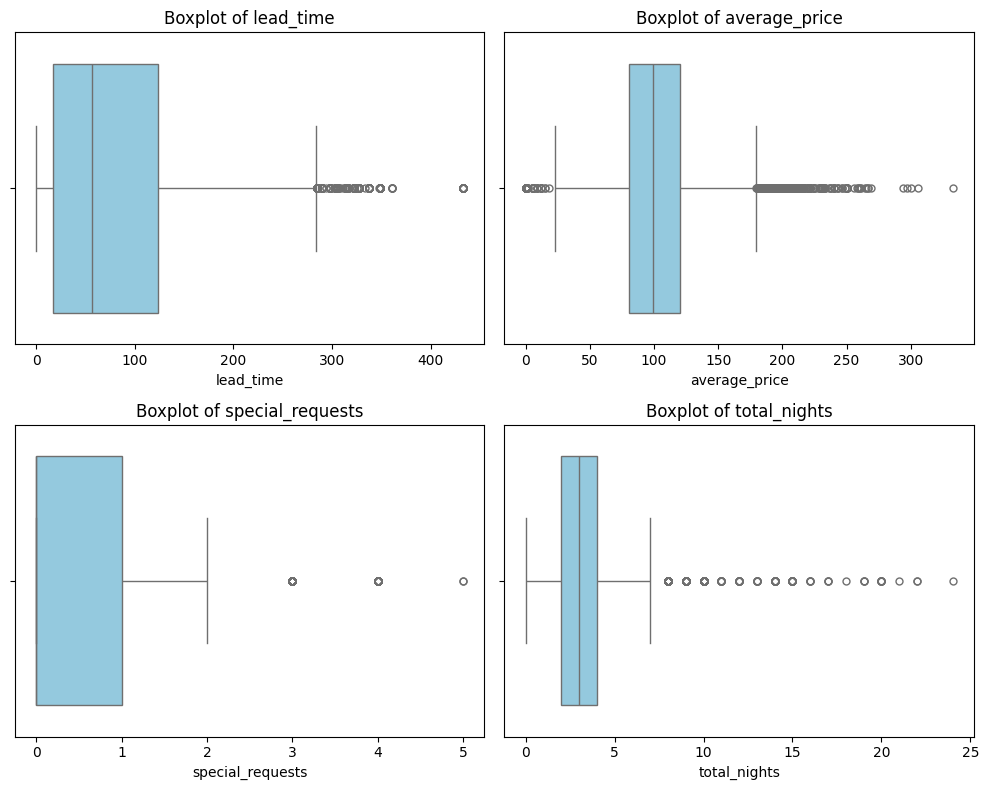

In [264]:
# @title Handle outliers using Z-score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Define numerical columns
num_cols = ['lead_time', 'average_price', 'special_requests', 'total_nights']

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[num_cols]))

# Identify Outliers
outliers = (z_scores > 3)

plt.figure(figsize=(10, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col], color='skyblue', fliersize=5)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [265]:
# @title Transformation For The Categorical Data
cat_cols = ['type_of_meal', 'room_type', 'market_segment_type']
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Encode target
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

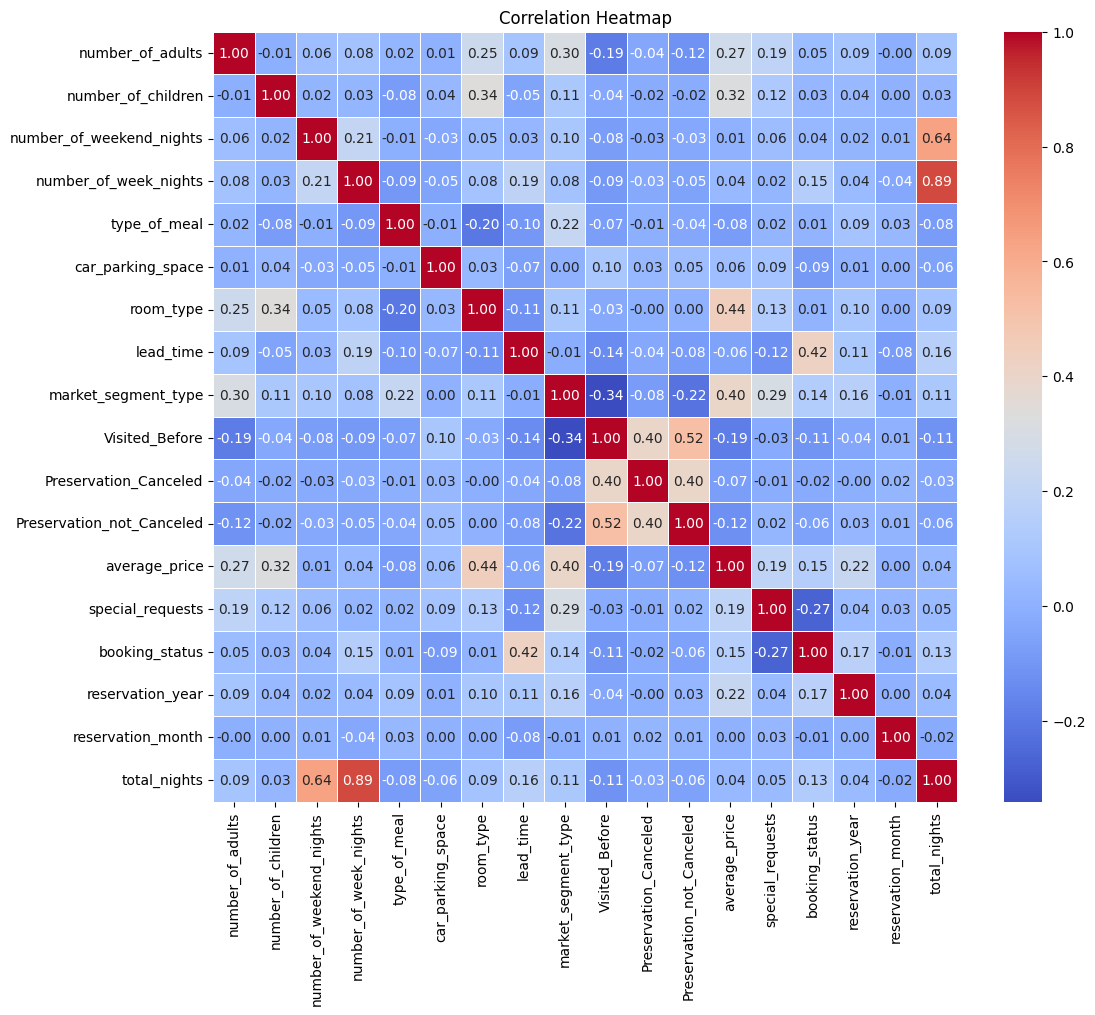

In [266]:
# @title Correlation heat map
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


Variance Inflation Factor (VIF):
                      feature           VIF
0       number_of_week_nights           inf
1    number_of_weekend_nights           inf
2                total_nights           inf
3                       const  2.992465e+07
4               average_price  1.627331e+00
5              Visited_Before  1.608493e+00
6         market_segment_type  1.566846e+00
7   Preservation_not_Canceled  1.475704e+00
8                   room_type  1.464517e+00
9       Preservation_Canceled  1.308075e+00
10           number_of_adults  1.248664e+00
11         number_of_children  1.220148e+00
12               type_of_meal  1.166297e+00
13           special_requests  1.162119e+00
14                  lead_time  1.150906e+00
15           reservation_year  1.098996e+00
16          car_parking_space  1.024239e+00
17          reservation_month  1.008901e+00


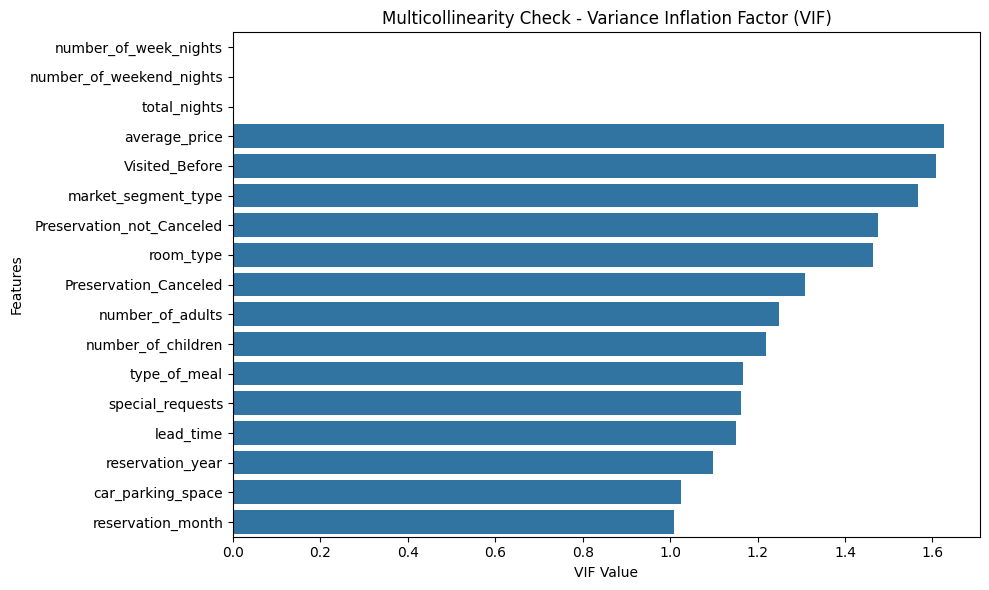

In [267]:
# @title Multicollinearity Check using VIF
# Add a constant to the features
X_train_const = add_constant(X_train)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_const.values, i)
                   for i in range(X_train_const.shape[1])]

# Sort VIF in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print("Variance Inflation Factor (VIF):")
print(vif_data)

# Visualize VIF
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='feature', data=vif_data[vif_data['feature'] != 'const'])
plt.title('Multicollinearity Check - Variance Inflation Factor (VIF)')
plt.xlabel('VIF Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [268]:
# @title Train-test split
X = df.drop(columns=['booking_status'])
y = df['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [269]:
# @title Linear Regression (for comparison only)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

lin_preds = lin_model.predict(X_test)

# Calculate RMSE
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_preds))
print(f"Linear Regression RMSE: {lin_rmse:.4f}")


Linear Regression RMSE: 0.3852


In [270]:
# @title Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_preds = poly_model.predict(X_test_poly)
poly_rmse = mean_squared_error(y_test, poly_preds)
print(f"Polynomial Regression (deg 2) RMSE: {poly_rmse:.4f}")


Polynomial Regression (deg 2) RMSE: 0.1302


In [271]:
 # @title Logistic Regression (main model for classification)
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_preds)
print(f"Logistic Regression Accuracy: {log_acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, log_preds))

Logistic Regression Accuracy: 0.7922

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      1865
           1       0.74      0.61      0.67       965

    accuracy                           0.79      2830
   macro avg       0.78      0.75      0.76      2830
weighted avg       0.79      0.79      0.79      2830

